In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [9]:
%reload_ext autoreload
%autoreload 2
from src import ODE_euler
import math


# Definición de la función diferencial
def f(t: float, y: float) -> float:
    return -5*y + 5*t**2 + 2*t

# Definición de parámetros del problema
a = t0
b = t_end
y_t0 = y0

# Resolución del problema mediante el método de Euler
y, t, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Cálculo de la solución exacta
y_exact = [ti**2 + (1/3) * math.exp(-5*ti) for ti in t]
error = [yi - y_exact_i for yi, y_exact_i in zip(y, y_exact)]

# Impresión de resultados
print("t:", t)
print("y:", y)
# Definir la función de la derivada
def dydt(t, y):
    return -5*y + 5*t**2 + 2*t

# Condiciones iniciales
t0 = 0
y0 = 1/3
N = 10
t_end = 1

print("h:", h)



t: [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
y: [0.3333333333333333, 0.16666666666666666, 0.10833333333333334, 0.11416666666666667, 0.16208333333333336, 0.2410416666666667, 0.34552083333333333, 0.4727604166666667, 0.6213802083333333, 0.7906901041666666, 0.9803450520833332]
h: 0.1


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



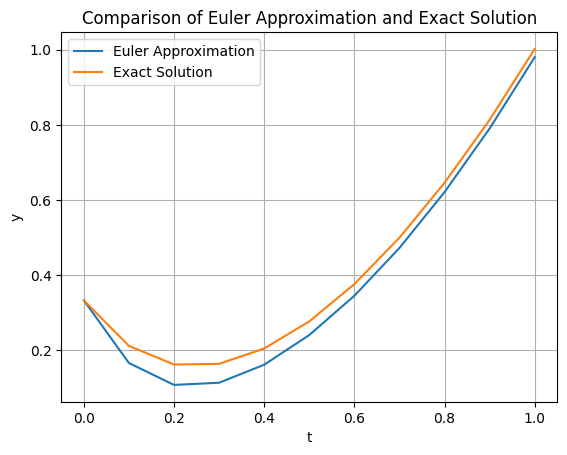

In [10]:
import matplotlib.pyplot as plt

# Graficar la solución real y la aproximación obtenida con el método de Euler
plt.plot(t, y, label='Euler Approximation')
plt.plot(t, y_exact, label='Exact Solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparison of Euler Approximation and Exact Solution')
plt.legend()
plt.grid(True)
plt.show()

# Errores
Calcule el eeror relativo para diferentes valores de N.

In [31]:

N_values = [10, 5, 20]

relative_errors = {}

for N in N_values:
    y_aprox, t, _ = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
    y_exact = [ti**2 + (1/3) * math.exp(-5*ti) for ti in t]
    relative_error = [abs((y_aprox_i - y_exact_i) / y_exact_i) for y_aprox_i, y_exact_i in zip(y_aprox, y_exact)]
    relative_errors[N] = relative_error

for N, errors in relative_errors.items():

    average_relative_errors = {N: sum(errors) / len(errors) for N, errors in relative_errors.items()}

for N, avg_error in average_relative_errors.items():
    print(f"Promedio del error relativo para N={N}: {avg_error:.4e}")

Promedio del error relativo para N=10: 1.2910e-01
Promedio del error relativo para N=5: 2.7979e-01
Promedio del error relativo para N=20: 6.3146e-02
